In [212]:
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [213]:
problem = "MagnetPendulum*.np"#"Gyroscope.np"
files={fname.split('_')[2]:fname for fname in glob.glob('rollout_errs_*'+problem)}

In [214]:
files

{'NN': 'rollout_errs_NN_MagnetPendulumm3l1q0.3mn2.np',
 'CHNN': 'rollout_errs_CHNN_MagnetPendulumm3l1q0.3mn2.np',
 'HNN': 'rollout_errs_HNN_MagnetPendulumm3l1q0.3mn2.np',
 'DeltaNN': 'rollout_errs_DeltaNN_MagnetPendulumm3l1q0.3mn2.np',
 'CLNN': 'rollout_errs_CLNN_MagnetPendulumm3l1q0.3mn2.np'}

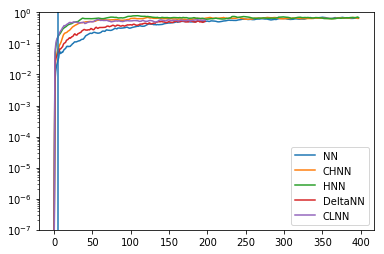

In [215]:
for model, fname in files.items():
    rel_errs = pickle.load(open(fname,'rb')).cpu().data.numpy()
    plt.plot(rel_errs.mean(0)[...,0][:-1],label=model)
    plt.yscale('log')
#plt.plot(rel_errs.mean(0)[...,1],label='GT+eps')
plt.axvline(5)
plt.ylim((1e-7,1))
plt.legend()

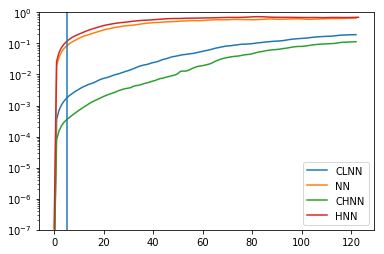

In [100]:
for model, fname in files.items():
    rel_errs = pickle.load(open(fname,'rb')).cpu().data.numpy()
    plt.plot(rel_errs.mean(0)[...,0][:-1],label=model)
    plt.yscale('log')
#plt.plot(rel_errs.mean(0)[...,1],label='GT+eps')
plt.axvline(5)
plt.ylim((1e-7,1))
plt.legend()

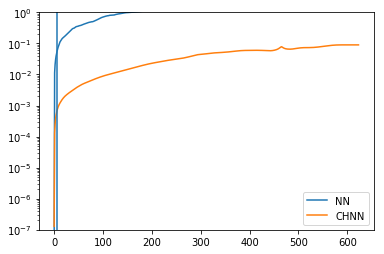

In [73]:
for model, fname in files.items():
    rel_errs = pickle.load(open(fname,'rb')).cpu().data.numpy()
    plt.plot(rel_errs.mean(0)[...,0][:-1],label=model)
    plt.yscale('log')
#plt.plot(rel_errs.mean(0)[...,1],label='GT+eps')
plt.axvline(5)
plt.ylim((1e-7,1))
plt.legend()

In [8]:
sns.lineplot(rel_errs[...,0])

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

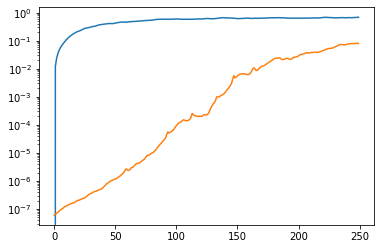

In [35]:
from biases.hamiltonian import ChainPendulum
body = ChainPendulum(2)
z0 = body.sample_initial_conditions(1)
zt = body.integrate(z0,torch.linspace(0,10,100))


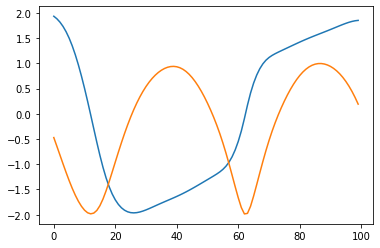

In [40]:
plt.plot(zt[0,:,0,1])

In [41]:
zt_angular = body.global2bodyCoords(zt[0])

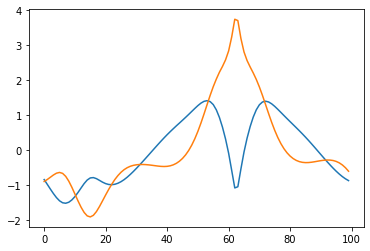

In [47]:
plt.plot(zt_angular[:,1].squeeze(-1))

In [49]:
ztp = body.body2globalCoords(zt_angular.squeeze(-1))

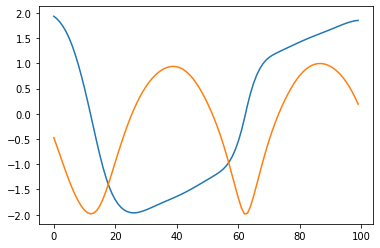

In [50]:
plt.plot(ztp[:,0,1])